# Confusion Matrix mit mehreren Klassen
### Naiver Bayes (Gaus basiert) mit dem Iris-Datensatz

In [1]:
import pandas as pd

df = pd.read_csv("data/iris.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln
# möchtest, kannst du das mit folgendem Code tun:
# df = pd.get_dummies(df, columns = ["Spaltenname"])

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df = df.drop(columns='Id')

In [3]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm" ]].values

# Oder: Die Spalte "success" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

y = df["Species"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4, test_size = 0.25)

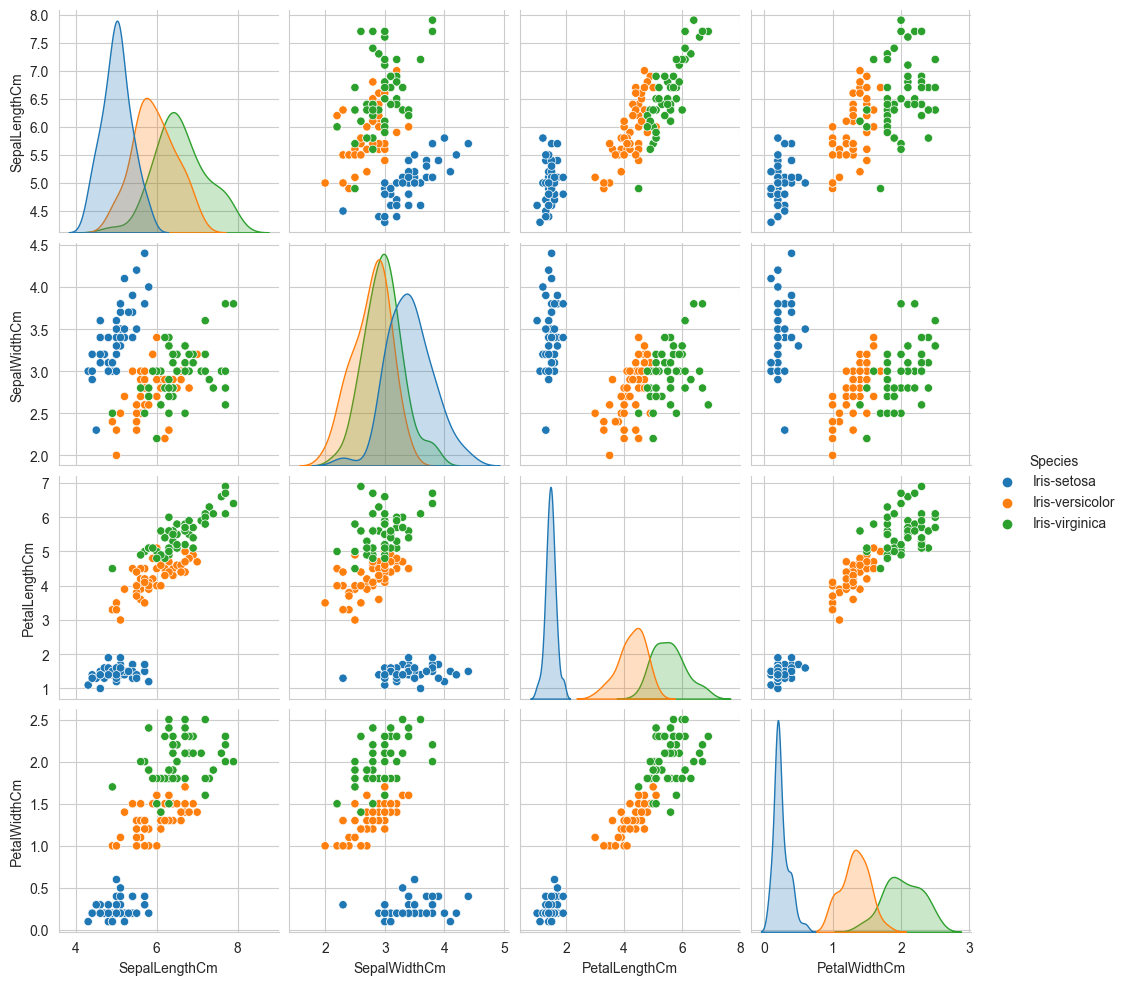

In [4]:
import seaborn as sns

sns.pairplot(df, hue="Species")

In [5]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


In [6]:
from sklearn.naive_bayes import GaussianNB
GaussianNB?

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9736842105263158


In [8]:
y_test_pred = model.predict(X_test)

### Das Format einer `confusion_matrix`:

|                        |Modell: Iris setosa | Modell: Iris versicolor | Modell: Iris virginica  
| -: | -: | :-: | :-: |
**Realität: Iris setosa** | Richtig vorhergesagt   |  falsch | falsch
**Realität: Iris versicolor**       | falsch    | Richtig vorhergesagt | falsch
**Realität: Iris virginica**       | falsch    | falsch | Richtig vorhergesagt


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[18,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 11]], dtype=int64)

In [10]:
print(confusion_matrix)

<function confusion_matrix at 0x000001C538A6E1F0>


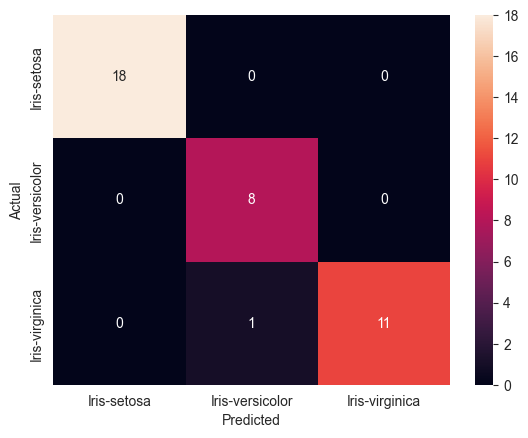

In [11]:
import pandas as pd
# Schöner in Seaborn.....
import seaborn as sn
import matplotlib.pyplot as plt

conf_mat = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True)

plt.show()